# It needs to read the values from a file instead of generating it again here!

# Liquid's 3D view

In [1]:
# If you want to be able to rotate, zoom, etc. Verify which GUIs are available by:
# %matplotlib --list
#
# %matplotlib osx

# Otherwise use the inline visualisation:
#
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib 

# Makes the figures in the PNG format:
# For more information see %config InlineBackend
%config InlineBackend.figure_formats=set([u'png'])

# plt.rcParams['figure.figsize'] = 5, 10 # redefines the figure's default size

import numpy

import save_load_file as slf

In [2]:
import numpy
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

    
# Generate the points to the 3D Scatter plot
def show_3d_connections(net_shape,\
                        camera=(45,-135), \
                        show_what='both', show_discc=False, show_conn=False, show_index=False, \
                        show_coord=False, show_arrows=False, markersize=(10,10,70,70), \
                        figsize=(100,100), tag_indices=[], filename="", imgtitle="Liquid's 3D structure"):
    '''
    Prints the neurons and the connections between them.
    net_shape->the same used to generate the liquid (list or tuple)
    show_what='both','exc' or 'inh'->controls which types of neurons should be plotted
    show_discc=False->doesn't show the neurons without connections to other ones
    show_conn=False->shows or not the lines between the connected neurons
    show_number=True->shows the index number of each neuron according to the Neurongroup
    show_coord=True->shows the x,y,z coordinates
    show_arrows=True->shows arrows indicating the direction of connections (very slow!)
    figsize=(width,height)->in millimetres
    markersize=(inh_dot,exc_dot,inh_star,exc_star)->sizes of the markers
    camera=(45,45)->camera angles, in degrees
    '''
    marker_size_inh,marker_size_exc,marker_size_rec_inh,marker_size_rec_exc = markersize
    user_elev,user_azim = camera
    fig_w,fig_h = figsize #figure size in millimetres
    NofN = net_shape[0]*net_shape[1]*net_shape[2]

    # This is how the liquid neurons index are distributed inside the 3D shape
    # Each line is a neuron index and the collumns are its x,y and z positions.
    count_3d=0;
    Neuron3DMatrix = numpy.empty((NofN,3),dtype=numpy.int)
    for zi in range(net_shape[2]):
        for yi in range(net_shape[1]):
            for xi in range(net_shape[0]):
                Neuron3DMatrix[count_3d][0]=xi;
                Neuron3DMatrix[count_3d][1]=yi;
                Neuron3DMatrix[count_3d][2]=zi;
                count_3d+=1;

    _exc_indices = []
    _inh_indices = []
    
    _disconnected = []
    if not show_discc:
        _disconnected = numpy.array(range(NofN))[output_connected(NofN)==0];
    
    if (show_what=='both' or show_what=='inh'):
        _inh_indices = output_inh_indices(NoINHN)
        # Positions of the neurons in the 3D space
        x_inh=[Neuron3DMatrix[i][0] for i in range(NofN) if (i in _inh_indices) and (i not in _disconnected)] 
        y_inh=[Neuron3DMatrix[i][1] for i in range(NofN) if (i in _inh_indices) and (i not in _disconnected)] 
        z_inh=[Neuron3DMatrix[i][2] for i in range(NofN) if (i in _inh_indices) and (i not in _disconnected)] 
        
        recurrent_connections_idx_inh = numpy.array(output_pre_i_connections(NoINHC)[output_pre_i_connections(NoINHC)==output_pos_i_connections(NoINHC)])
        x_rec_inh=[i[0] for i in Neuron3DMatrix[[i for i in recurrent_connections_idx_inh if i not in _disconnected]]] 
        y_rec_inh=[i[1] for i in Neuron3DMatrix[[i for i in recurrent_connections_idx_inh if i not in _disconnected]]]
        z_rec_inh=[i[2] for i in Neuron3DMatrix[[i for i in recurrent_connections_idx_inh if i not in _disconnected]]]

        # List of tuples with (pre synaptic, post synaptic) INHIBITORY->ANYTHING neurons connections indexes
        inh_connect_positions_pre  = [Neuron3DMatrix[i] for i,j in zip(output_pre_i_connections(NoINHC),range(NoINHC)) if  (output_pre_i_connections(NoINHC)[j]!=output_pos_i_connections(NoINHC)[j])]
        inh_connect_positions_post = [Neuron3DMatrix[i] for i,j in zip(output_pos_i_connections(NoINHC),range(NoINHC)) if  (output_pre_i_connections(NoINHC)[j]!=output_pos_i_connections(NoINHC)[j])]        
        
        
    if (show_what=='both' or show_what=='exc'):
        _exc_indices = output_exc_indices(NoEXCN)
        x_exc=[Neuron3DMatrix[i][0] for i in range(NofN) if (i in _exc_indices) and not (i in _disconnected)] 
        y_exc=[Neuron3DMatrix[i][1] for i in range(NofN) if (i in _exc_indices) and not (i in _disconnected)] 
        z_exc=[Neuron3DMatrix[i][2] for i in range(NofN) if (i in _exc_indices) and not (i in _disconnected)] 

        recurrent_connections_idx_exc = numpy.array(output_pre_e_connections(NoEXCC)[output_pre_e_connections(NoEXCC)==output_pos_e_connections(NoEXCC)])
        x_rec_exc=[i[0] for i in Neuron3DMatrix[[i for i in recurrent_connections_idx_exc if i not in _disconnected]]] 
        y_rec_exc=[i[1] for i in Neuron3DMatrix[[i for i in recurrent_connections_idx_exc if i not in _disconnected]]]
        z_rec_exc=[i[2] for i in Neuron3DMatrix[[i for i in recurrent_connections_idx_exc if i not in _disconnected]]]

        # List of tuples with (pre synaptic, post synaptic) EXCITATORY->ANYTHING neurons connections indexes
        exc_connect_positions_pre  = [Neuron3DMatrix[i] for i,j in zip(output_pre_e_connections(NoEXCC),range(NoEXCC)) if (output_pre_e_connections(NoEXCC)[j]!=output_pos_e_connections(NoEXCC)[j])]
        exc_connect_positions_post = [Neuron3DMatrix[i] for i,j in zip(output_pos_e_connections(NoEXCC),range(NoEXCC)) if (output_pre_e_connections(NoEXCC)[j]!=output_pos_e_connections(NoEXCC)[j])]


    fig = plt.figure() # creates the figure for the following plots
    fig.set_size_inches(fig_w/25.4,fig_h/25.4, forward=False) #Set the figure size in inches (1in == 2.54cm)
    ax = fig.add_subplot(111, projection='3d') # setup to only one

    if (show_what=='both' or show_what=='inh'):    
        ax.scatter(x_inh, y_inh, z_inh, c='b', s=[marker_size_inh]*len(x_inh)) # plots the points correnponding to the inhibitory neurons

    if (show_what=='both' or show_what=='exc'):         
        ax.scatter(x_exc, y_exc, z_exc, c='r', s=[marker_size_exc]*len(x_exc)) # plots the points correnponding to the excitatory neurons

    if (show_what=='both' or show_what=='inh'):    
        ax.scatter(x_rec_inh, y_rec_inh, z_rec_inh, c='b', marker='*', s=[marker_size_rec_inh]*len(x_rec_inh)) # plots where a inhibitory neuron has a reccurent connection

    if (show_what=='both' or show_what=='exc'):    
        ax.scatter(x_rec_exc, y_rec_exc, z_rec_exc, c='r', marker='*', s=[marker_size_rec_exc]*len(x_rec_exc)) # plots where a excitatory neuron has a reccurent connection
    
    _what_to_show = []
    if (show_what=='both' or show_what=='exc'):
        _what_to_show += _exc_indices.tolist()
    if (show_what=='both' or show_what=='inh'):
        _what_to_show += _inh_indices.tolist()        
        
    # Insert a label with the position of each neuron according to the positions_list (NeuronGroup)
    if show_index:    
        for t,n in [(Neuron3DMatrix[i],i) for i in range(NofN) if (i in _what_to_show) and (i not in _disconnected) and (i in tag_indices)]:
            ax.text(t[0], t[1], t[2], "["+str(n)+"]")

#     if show_index:
#         for ti in tag_indices:
#             t=Neuron3DMatrix[ti]
#             ax.text(t[0], t[1], t[2], "["+str(ti)+"]")            

    # Insert a label with the 3D coordinate used to calculate the connection probabilities
    if show_coord:
        for t,n in [(Neuron3DMatrix[i],i) for i in range(NofN) if (i in _what_to_show) and (i not in _disconnected)]:
            ax.text(t[0], t[1], t[2], str(t)+"="+str(n)) # to insert also the coordinates of the point

    #
    # Draw a 3D vector (arrow)
    from matplotlib.patches import FancyArrowPatch
    from mpl_toolkits.mplot3d import proj3d

    class Arrow3D(FancyArrowPatch):
        def __init__(self, xs, ys, zs, *args, **kwargs):
            FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
            self._verts3d = xs, ys, zs

        def draw(self, renderer):
            xs3d, ys3d, zs3d = self._verts3d
            xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
            self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
            FancyArrowPatch.draw(self, renderer)

    if show_conn:
        if show_arrows:
            # Plot the EXCITATORY connections
            if (show_what=='both' or show_what=='exc'):    
                for i in range(len(exc_connect_positions_pre)):
                    a = Arrow3D(
                        [ exc_connect_positions_pre[i][0], exc_connect_positions_post[i][0] ], 
                        [ exc_connect_positions_pre[i][1], exc_connect_positions_post[i][1] ], 
                        [ exc_connect_positions_pre[i][2], exc_connect_positions_post[i][2] ], 
                        label='excitatory connections', mutation_scale=20, lw=1, arrowstyle="-|>", color="r")
                    ax.add_artist(a)
        else:
            if (show_what=='both' or show_what=='exc'):    
                # Plot the EXCITATORY connections - FAST VERSION WITHOUT ARROWS
                for i in range(len(exc_connect_positions_pre)):
                    ax.plot(
                        [ exc_connect_positions_pre[i][0], exc_connect_positions_post[i][0] ], 
                        [ exc_connect_positions_pre[i][1], exc_connect_positions_post[i][1] ], 
                        [ exc_connect_positions_pre[i][2], exc_connect_positions_post[i][2] ], 
                        label='excitatory connections', color='#FF0000')

        if show_arrows:
            if (show_what=='both' or show_what=='inh'):    
                # Plot the INHIBITORY connections
                for i in range(len(inh_connect_positions_pre)):
                    a = Arrow3D(
                        [ inh_connect_positions_pre[i][0], inh_connect_positions_post[i][0] ], 
                        [ inh_connect_positions_pre[i][1], inh_connect_positions_post[i][1] ], 
                        [ inh_connect_positions_pre[i][2], inh_connect_positions_post[i][2] ], 
                        label='inhibitory connections', mutation_scale=20, lw=1, arrowstyle="-|>", color="b")
                    ax.add_artist(a)
        else:
            if (show_what=='both' or show_what=='inh'):                
                # Plot the INHIBITORY connections - FAST VERSION WITHOUT ARROWS
                for i in range(len(inh_connect_positions_pre)):
                    ax.plot(
                        [ inh_connect_positions_pre[i][0], inh_connect_positions_post[i][0] ], 
                        [ inh_connect_positions_pre[i][1], inh_connect_positions_post[i][1] ], 
                        [ inh_connect_positions_pre[i][2], inh_connect_positions_post[i][2] ], 
                        label='inhibitory connections', color='#0000FF')


    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.title(imgtitle)
    
    ax.view_init(elev=user_elev, azim=user_azim)
    
    if filename!="":
        plt.savefig(filename, bbox_inches='tight',pad_inches=1)    
        
    plt.show()



In [3]:
# show_3d_connections(net_shape, camera=(45,-135), show_what='both', show_discc=True, show_conn=False, show_index=True, show_coord=False, show_arrows=False, markersize=(10,10,120,120),figsize=(500,300))

In [4]:
# This only makes sense if the control_connected(numpy.ones(NofN,dtype=numpy.int32)) was NOT used.
# print "Percentage of Disconnected Neurons:", 100*(len(numpy.array(range(NofN))[output_connected(NofN)==0])/float(NofN))

In [6]:
# Liquid's shape
net_shape = numpy.array([20,5,6])

In [7]:
input_variable=1 # The index goes from 0 to 4 => [s0,s1,e1,w1]
neuron_index=0 # Doesn't matter because only weights change...

show_3d_connections(net_shape, camera=(45,-135), show_what='both', \
                    show_discc=True, show_conn=False, show_index=True, \
                    show_coord=False, show_arrows=False, markersize=(10/2.,10/2.,120/2.,120/2.),figsize=(500,300),\
                    imgtitle='Liquid 3D Structure - Slice directly connected to input variable '+str(input_variable),\
#                     tag_indices=range(NofN))
                    tag_indices=numpy.array(inputs_indices[input_variable][neuron_index]))

NameError: name 'inputs_indices' is not defined

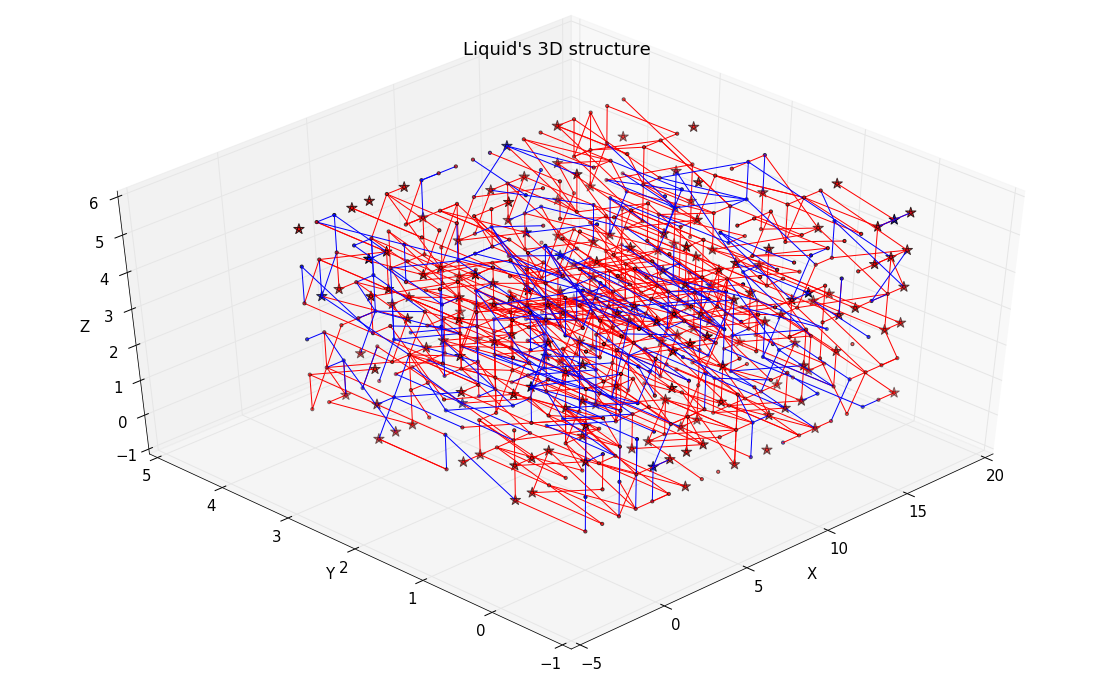

In [46]:
show_3d_connections(net_shape, camera=(45,-135), show_what='both', \
                    show_discc=True, show_conn=True, show_index=False, \
                    show_coord=False, show_arrows=False, \
                    markersize=(10,10,120,120),figsize=(500,300), \
                    tag_indices=range(NofN))